# Customer Churn Prediction

This competition is about predicting whether a customer will change telecommunications provider, something known as "churning".

### File descriptions
- __train.csv__ - the training set.
    Contains 4250 lines with 20 columns. 3652 samples (85.93%) belong to class churn=no and 598 samples (14.07%) belong to class churn=yes
- __test.csv__ - the test set.
    Contains 750 lines with 20 columns: the index of each sample and the 19 features (missing the target variable "churn").
- __sampleSubmission.csv__ - a sample submission file in the correct format

### Data fields
- __state__, string. 2-letter code of the US state of customer residence
- __account_length__, numerical. Number of months the customer has been with the current telco provider
- __area_code__, string="area_code_AAA" where AAA = 3 digit area code.
- __international_plan__, (yes/no). The customer has international plan.
- __voice_mail_plan__, (yes/no). The customer has voice mail plan.
- __number_vmail_messages__, numerical. Number of voice-mail messages.
- __total_day_minutes__, numerical. Total minutes of day calls.
- __total_day_calls__, numerical. Total number of day calls.
- __total_day_charge__, numerical. Total charge of day calls.
- __total_eve_minutes__, numerical. Total minutes of evening calls.
- __total_eve_calls__, numerical. Total number of evening calls.
- __total_eve_charge__, numerical. Total charge of evening calls.
- __total_night_minutes__, numerical. Total minutes of night calls.
- __total_night_calls__, numerical. Total number of night calls.
- __total_night_charge__, numerical. Total charge of night calls.
- __total_intl_minutes__, numerical. Total minutes of international calls.
- __total_intl_calls__, numerical. Total number of international calls.
- __total_intl_charge__, numerical. Total charge of international calls
- __number_customer_service_calls__, numerical. Number of calls to customer service
- __churn__, (yes/no). Customer churn - target variable.

In [249]:
# Importar Bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

#Modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import RepeatedKFold # Cross Validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importar training set
train_dt = pd.read_csv('customer-churn-prediction-2020/train.csv')

# Estatística Descritiva

In [56]:
train_dt.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [57]:
train_dt.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   120
total_eve_calls                   123
total_night_calls                 128
total_intl_minutes                168
total_intl_charge                 168
account_length                    215
total_night_charge                992
total_eve_charge                 1572
total_night_minutes              1757
total_eve_minutes                1773
total_day_charge                 1843
total_day_minutes                1843
dtype: int64

In [58]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

### Variáveis Categóricas

Gráficos de Barra: verificar desbaleceamento dos churn positivos dentro dos grupos.

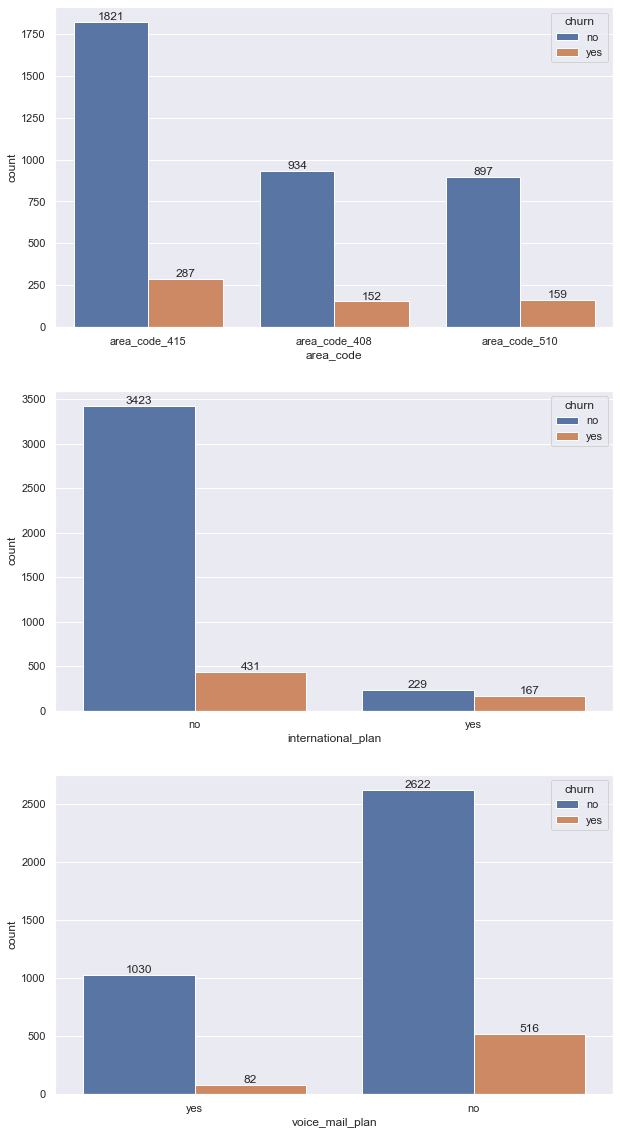

In [59]:
sns.set(font_scale=1)
fig = plt.figure(figsize=[10,20])


fig.add_subplot(3,1,1)
a = sns.countplot(x=train_dt["area_code"], hue=train_dt["churn"])
for i in a.containers:
    a.bar_label(i,)

fig.add_subplot(3,1,2)
b = sns.countplot(x=train_dt["international_plan"], hue=train_dt["churn"])
for i in b.containers:
    b.bar_label(i,)

fig.add_subplot(3,1,3)
c = sns.countplot(x=train_dt["voice_mail_plan"], hue=train_dt["churn"])
for i in c.containers:
    c.bar_label(i,)

<AxesSubplot:xlabel='churn', ylabel='Percent'>

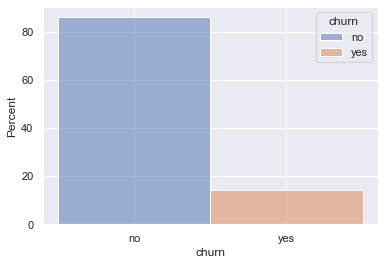

In [60]:
sns.histplot(data=train_dt,x='churn' ,hue='churn',stat='percent')

In [61]:
pd.crosstab(index = train_dt.churn, columns=train_dt['churn'], normalize=True,margins=True, margins_name='Total')



churn,no,yes,Total
churn,,,
no,0.859294,0.000000,0.859294
yes,0.000000,0.140706,0.140706
Total,0.859294,0.140706,1.000000


In [62]:
print('Intervalo de Confianca', sm.stats.proportion_confint(count=598, nobs=4250, alpha=0.05, method='normal'))
p=0.15
p0=0.140706
Z=(p-p0)/np.sqrt(p0*(1-p0)/4250)
import scipy.stats.distributions as dist
pvalue = 1*dist.norm.sf(np.abs(Z))
print('Z test = ',Z, '\n pvalue = ', pvalue, '\n alpha = 0.05')

Intervalo de Confianca (0.13025192624412077, 0.1511598384617616)
Z test =  1.7424885578567342 
 pvalue =  0.04071149595149195 
 alpha = 0.05


In [63]:
churn_state = train_dt.groupby('state').churn.value_counts(normalize=True).unstack('churn').sort_values(by='no',ascending=False)

0 churn
no     0.95
yes    0.05
Name: 0, dtype: float64
1 churn
no     0.948052
yes    0.051948
Name: 1, dtype: float64
2 churn
no     0.934426
yes    0.065574
Name: 2, dtype: float64
3 churn
no     0.931507
yes    0.068493
Name: 3, dtype: float64
4 churn
no     0.931034
yes    0.068966
Name: 4, dtype: float64
5 churn
no     0.925532
yes    0.074468
Name: 5, dtype: float64
6 churn
no     0.924051
yes    0.075949
Name: 6, dtype: float64
7 churn
no     0.9125
yes    0.0875
Name: 7, dtype: float64
8 churn
no     0.910448
yes    0.089552
Name: 8, dtype: float64
9 churn
no     0.909091
yes    0.090909
Name: 9, dtype: float64
10 churn
no     0.898551
yes    0.101449
Name: 10, dtype: float64
11 churn
no     0.894737
yes    0.105263
Name: 11, dtype: float64
12 churn
no     0.890625
yes    0.109375
Name: 12, dtype: float64
13 churn
no     0.888889
yes    0.111111
Name: 13, dtype: float64
14 churn
no     0.8875
yes    0.1125
Name: 14, dtype: float64
15 churn
no     0.887097
yes    0.112903
Name:

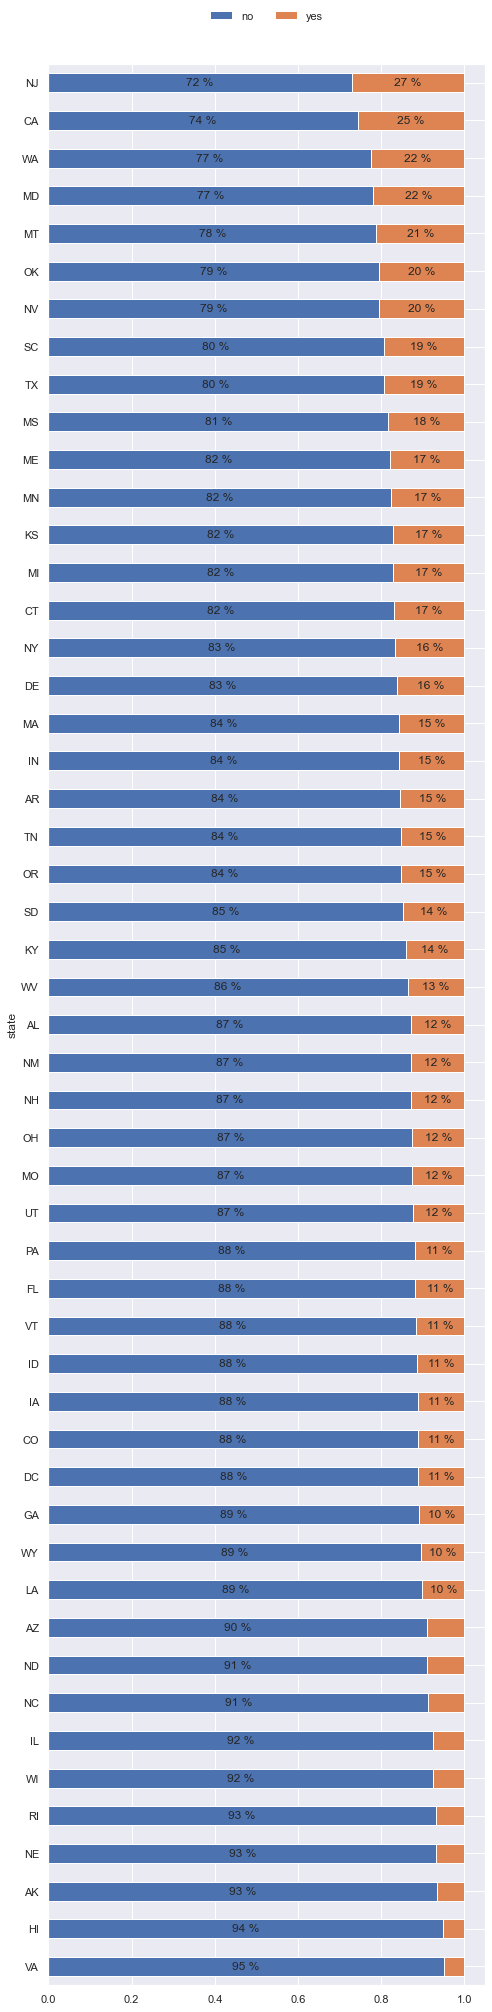

In [64]:

churn_state.plot.barh(stacked=True, figsize=(7,28))
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,)
for ix, row in churn_state.reset_index(drop=True).iterrows():
    print(ix, row)
    cumulative = 0
    for element in row:
        if element > 0.1:
            plt.text(
                cumulative + element / 2,
                ix,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
                )
        cumulative += element
plt.tight_layout()
plt.show()

In [65]:
churn_economic_regions = train_dt[['state','churn']]
churn_economic_regions['state'] = train_dt['state'].map({
                        'CT':'NE', 'ME':'NE', 'MA':'NE', 'NH':'NE', 'RI':'NE', 'VT':'NE',
                        'DE': 'ME', 'DC': 'ME', 'MD': 'ME', 'NJ':'ME', 'NY':'ME', 'PA':'ME',
                        'IL': 'GL', 'IN': 'GL', 'MI': 'GL', 'OH': 'GL', 'WI':'GL',
                        'IA': 'PN', 'KS': 'PN', 'MN':'PN', 'ND':'PN', 'SD':'PN',
                        'AL': 'SE', 'AR': 'SE', 'FL': 'SE', 'GA': 'SE', 'KY': 'SE','LA': 'SE', 'MS': 'SE','NC': 'SE','SC': 'SE','TN': 'SE','VA': 'SE','WV':'SE',
                        'AZ': 'SW', 'NM': 'SW', 'OK': 'SW', 'TX':'SW',
                        'CO': 'RM', 'ID': 'RM', 'MT': 'RM', 'UT': 'RM', 'WY':'RM',
                        'AK': 'FW', 'CA': 'FW', 'HI': 'FW', 'NV': 'FW', 'OR': 'FW', 'WA':'FW'
                        })
churn_economic_regions = churn_economic_regions.groupby('state').churn.value_counts(normalize=True).unstack('churn').sort_values(by='no',ascending=False)

/var/folders/2v/3xmrj4ts6psb7j4nt0tr75980000gn/T/ipykernel_21953/2051509204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_economic_regions['state'] = train_dt['state'].map({


0 churn
no     0.878995
yes    0.121005
Name: 0, dtype: float64
1 churn
no     0.871316
yes    0.128684
Name: 1, dtype: float64
2 churn
no     0.868996
yes    0.131004
Name: 2, dtype: float64
3 churn
no     0.862669
yes    0.137331
Name: 3, dtype: float64
4 churn
no     0.854637
yes    0.145363
Name: 4, dtype: float64
5 churn
no     0.845103
yes    0.154897
Name: 5, dtype: float64
6 churn
no     0.8429
yes    0.1571
Name: 6, dtype: float64
7 churn
no     0.818913
yes    0.181087
Name: 7, dtype: float64


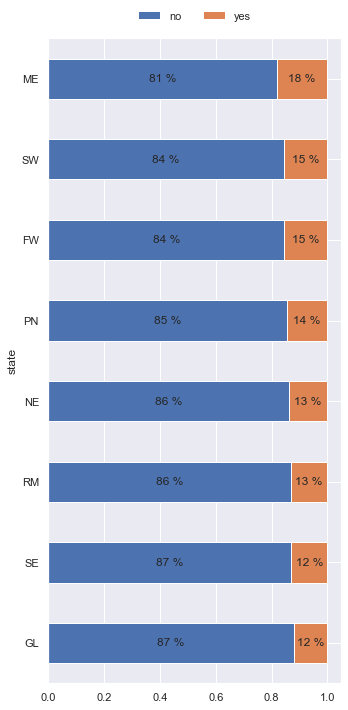

In [66]:

churn_economic_regions.plot.barh(stacked=True, figsize=(5,10))
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,)
for ix, row in churn_economic_regions.reset_index(drop=True).iterrows():
    print(ix, row)
    cumulative = 0
    for element in row:
        if element > 0.1:
            plt.text(
                cumulative + element / 2,
                ix,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
                )
        cumulative += element
plt.tight_layout()
plt.show()

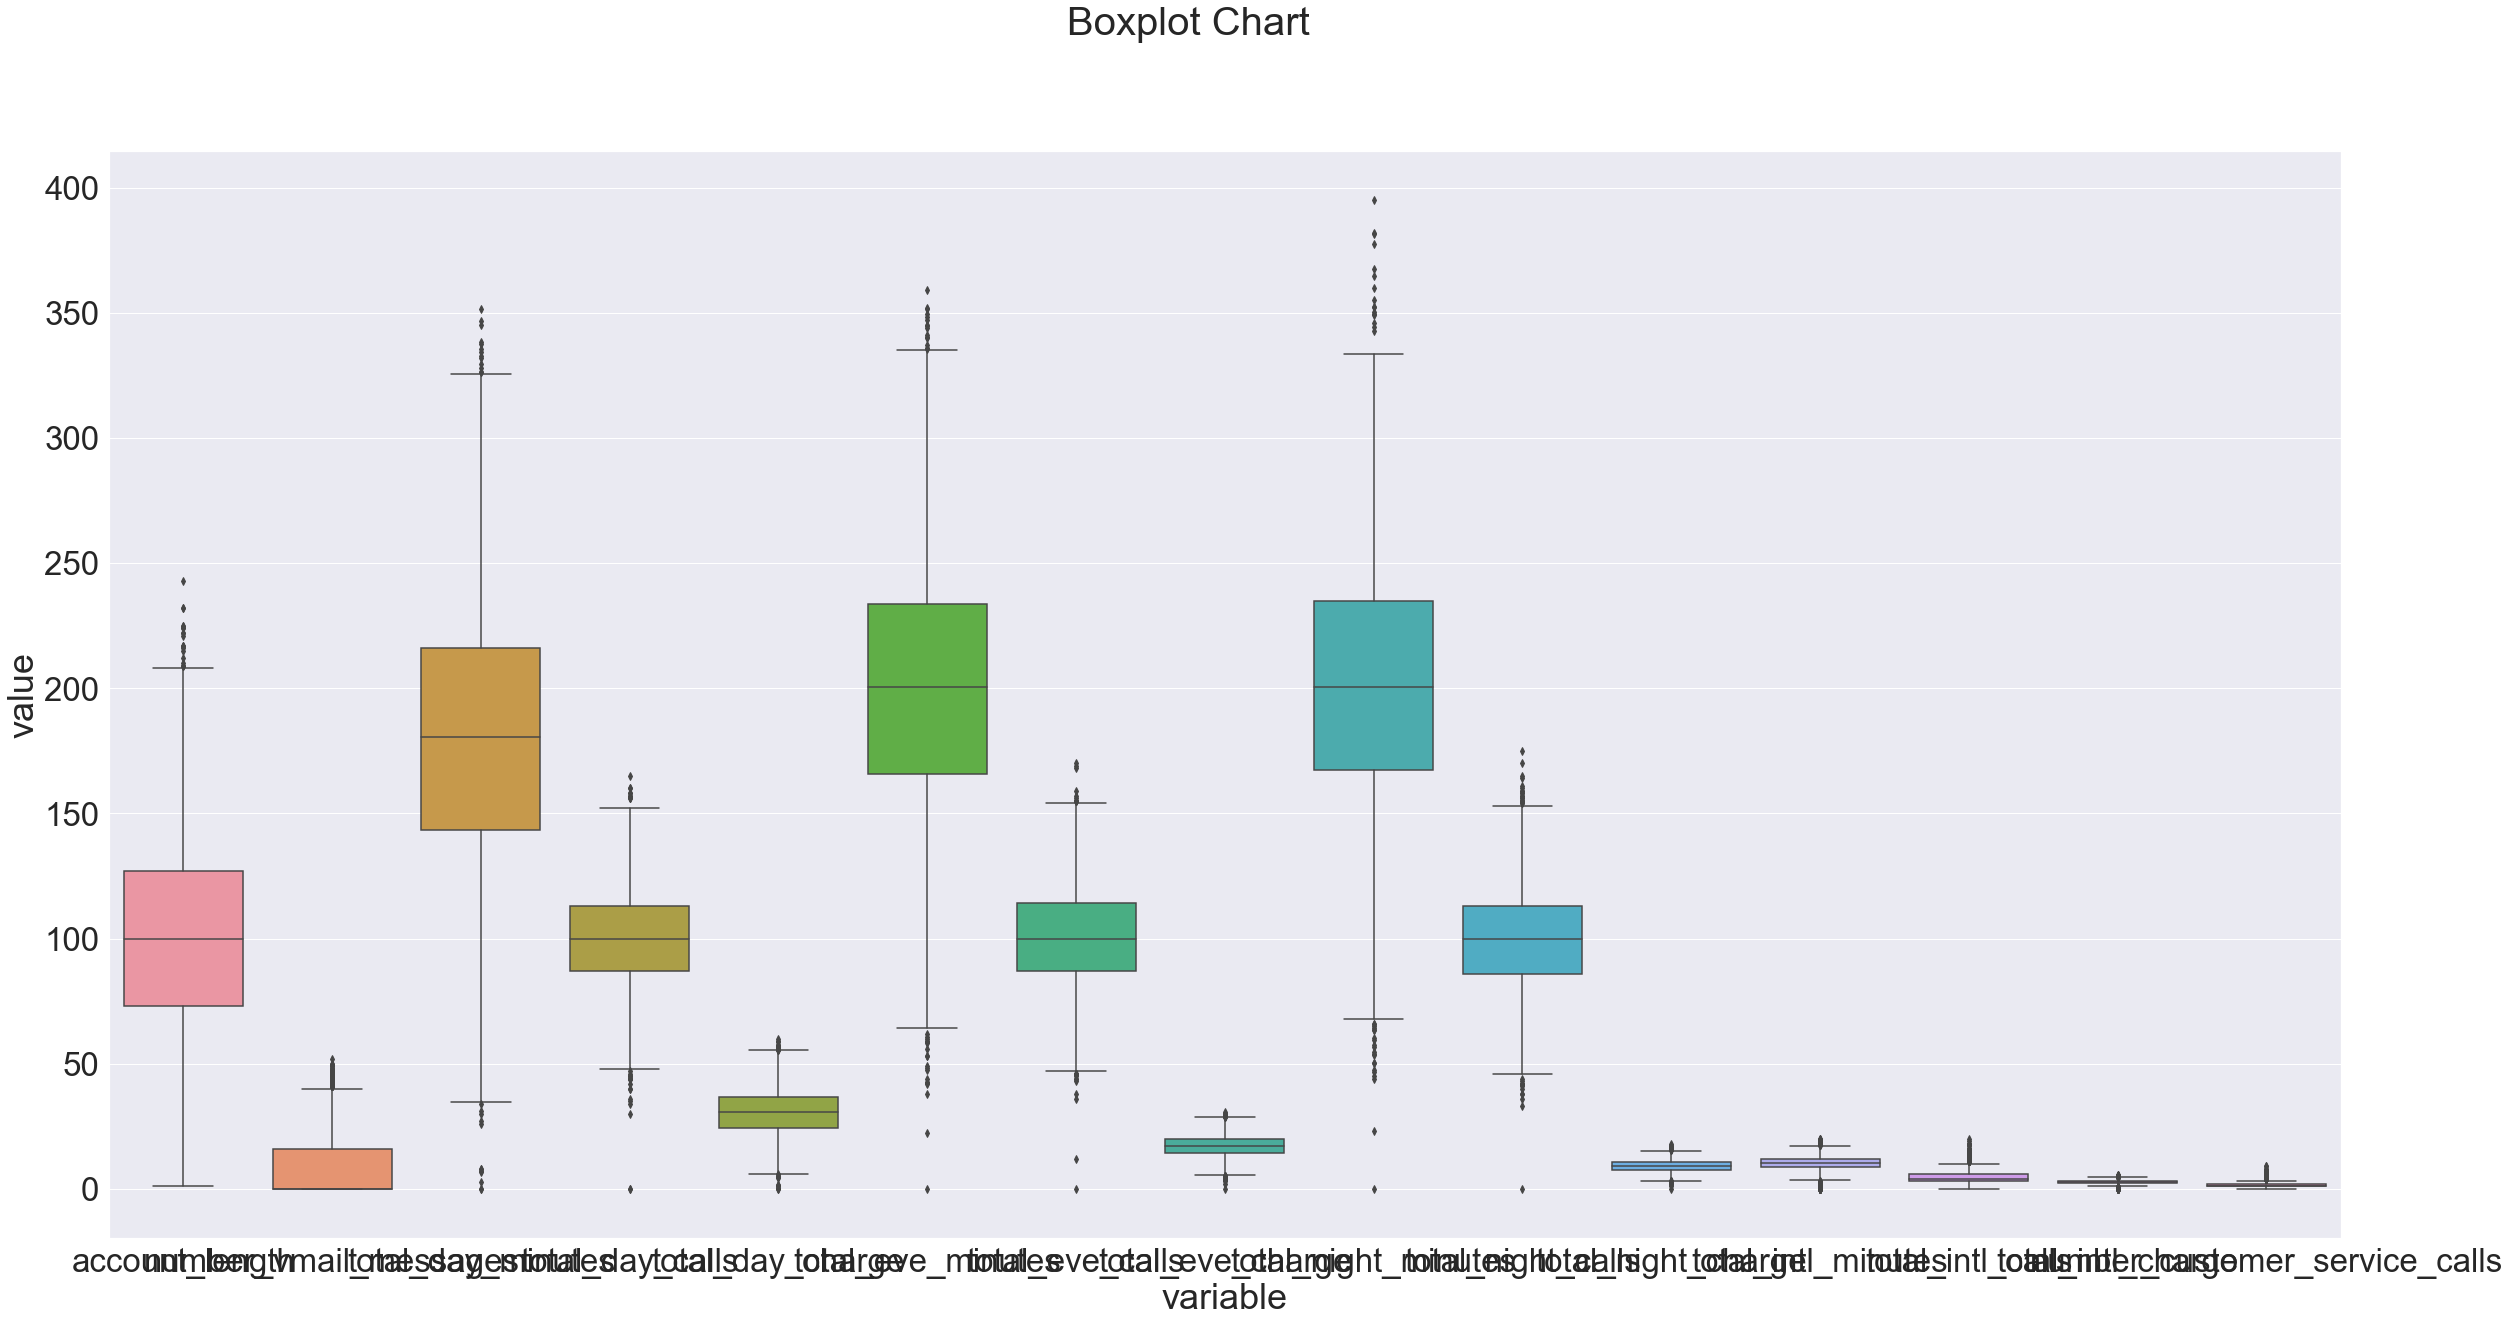

In [67]:
chart_data = train_dt.select_dtypes(include='number') #Apenas valores contíuos -> sem variáveis categóricas
sns.set(font_scale=3)

fig = plt.figure(figsize=[40, 20])
fig.suptitle('Boxplot Chart', fontsize=40)

sns.boxplot(x="variable", y="value", data=pd.melt(chart_data))
plt.show()

No handles with labels found to put in legend.


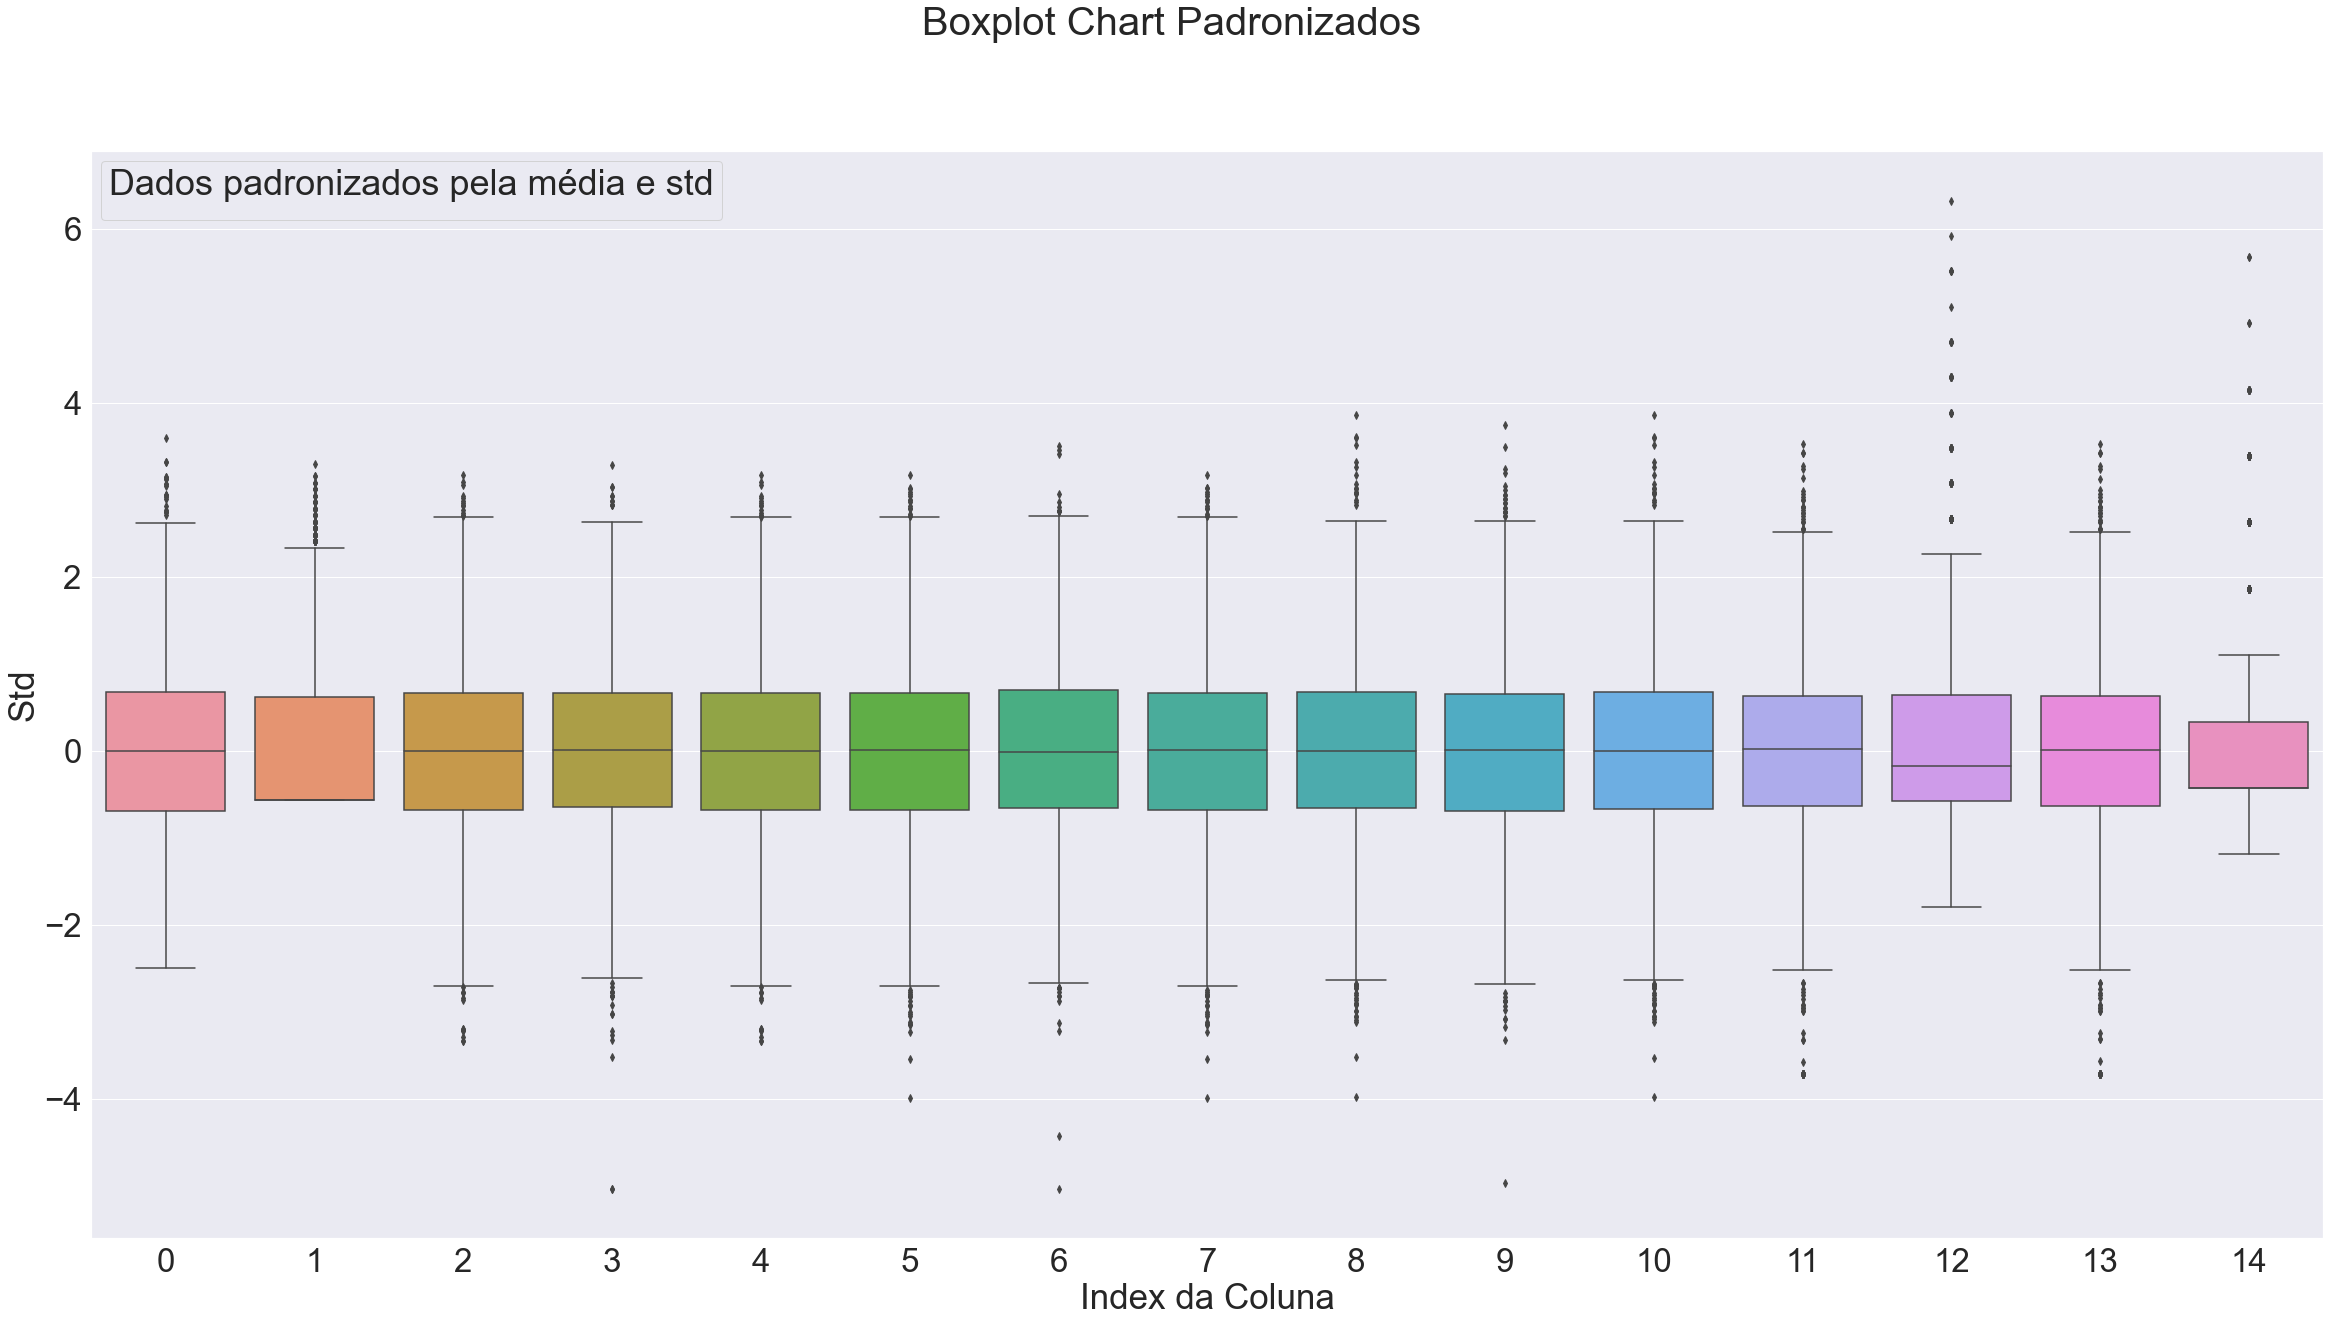

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


In [68]:
chart_data_std = StandardScaler().fit_transform(chart_data)

fig = plt.figure(figsize=[40, 20])
fig.suptitle('Boxplot Chart Padronizados', fontsize=40)

sns.boxplot(x="variable", y="value", data=pd.melt(pd.DataFrame(chart_data_std)))

plt.legend(title='Dados padronizados pela média e std', fontsize=20)
plt.ylabel('Std', fontsize=35);
plt.xlabel('Index da Coluna', fontsize=35);
plt.show()

print(chart_data.columns)

In [69]:
def Drop_Outlier (data_input):
    data = data_input
    data = data.select_dtypes(include='number')
    Nome_col = data.columns
    drop_rows = np.empty([0,0])
    for col in Nome_col:
        Q1 = np.percentile(data[col], 25, interpolation='midpoint')
        Q3 = np.percentile(data[col], 75, interpolation='midpoint')
        IQR = Q3 - Q1
        
        trashold_inferior = Q1 - 1.5*IQR
        trashold_superior = Q3 + 1.5*IQR

        limit_sup = data[col] >= trashold_superior
        limit_inf = data[col] <= trashold_inferior

        upper_points = np.where(limit_sup) 
        lower_points = np.where(limit_inf)

        drop_rows = np.append(drop_rows, upper_points)
        drop_rows = np.append(drop_rows, lower_points)

    data_output = data_input.drop(drop_rows[:])
    
    return data_output

In [70]:
chart_data_std = StandardScaler().fit_transform(Drop_Outlier(chart_data))

No handles with labels found to put in legend.


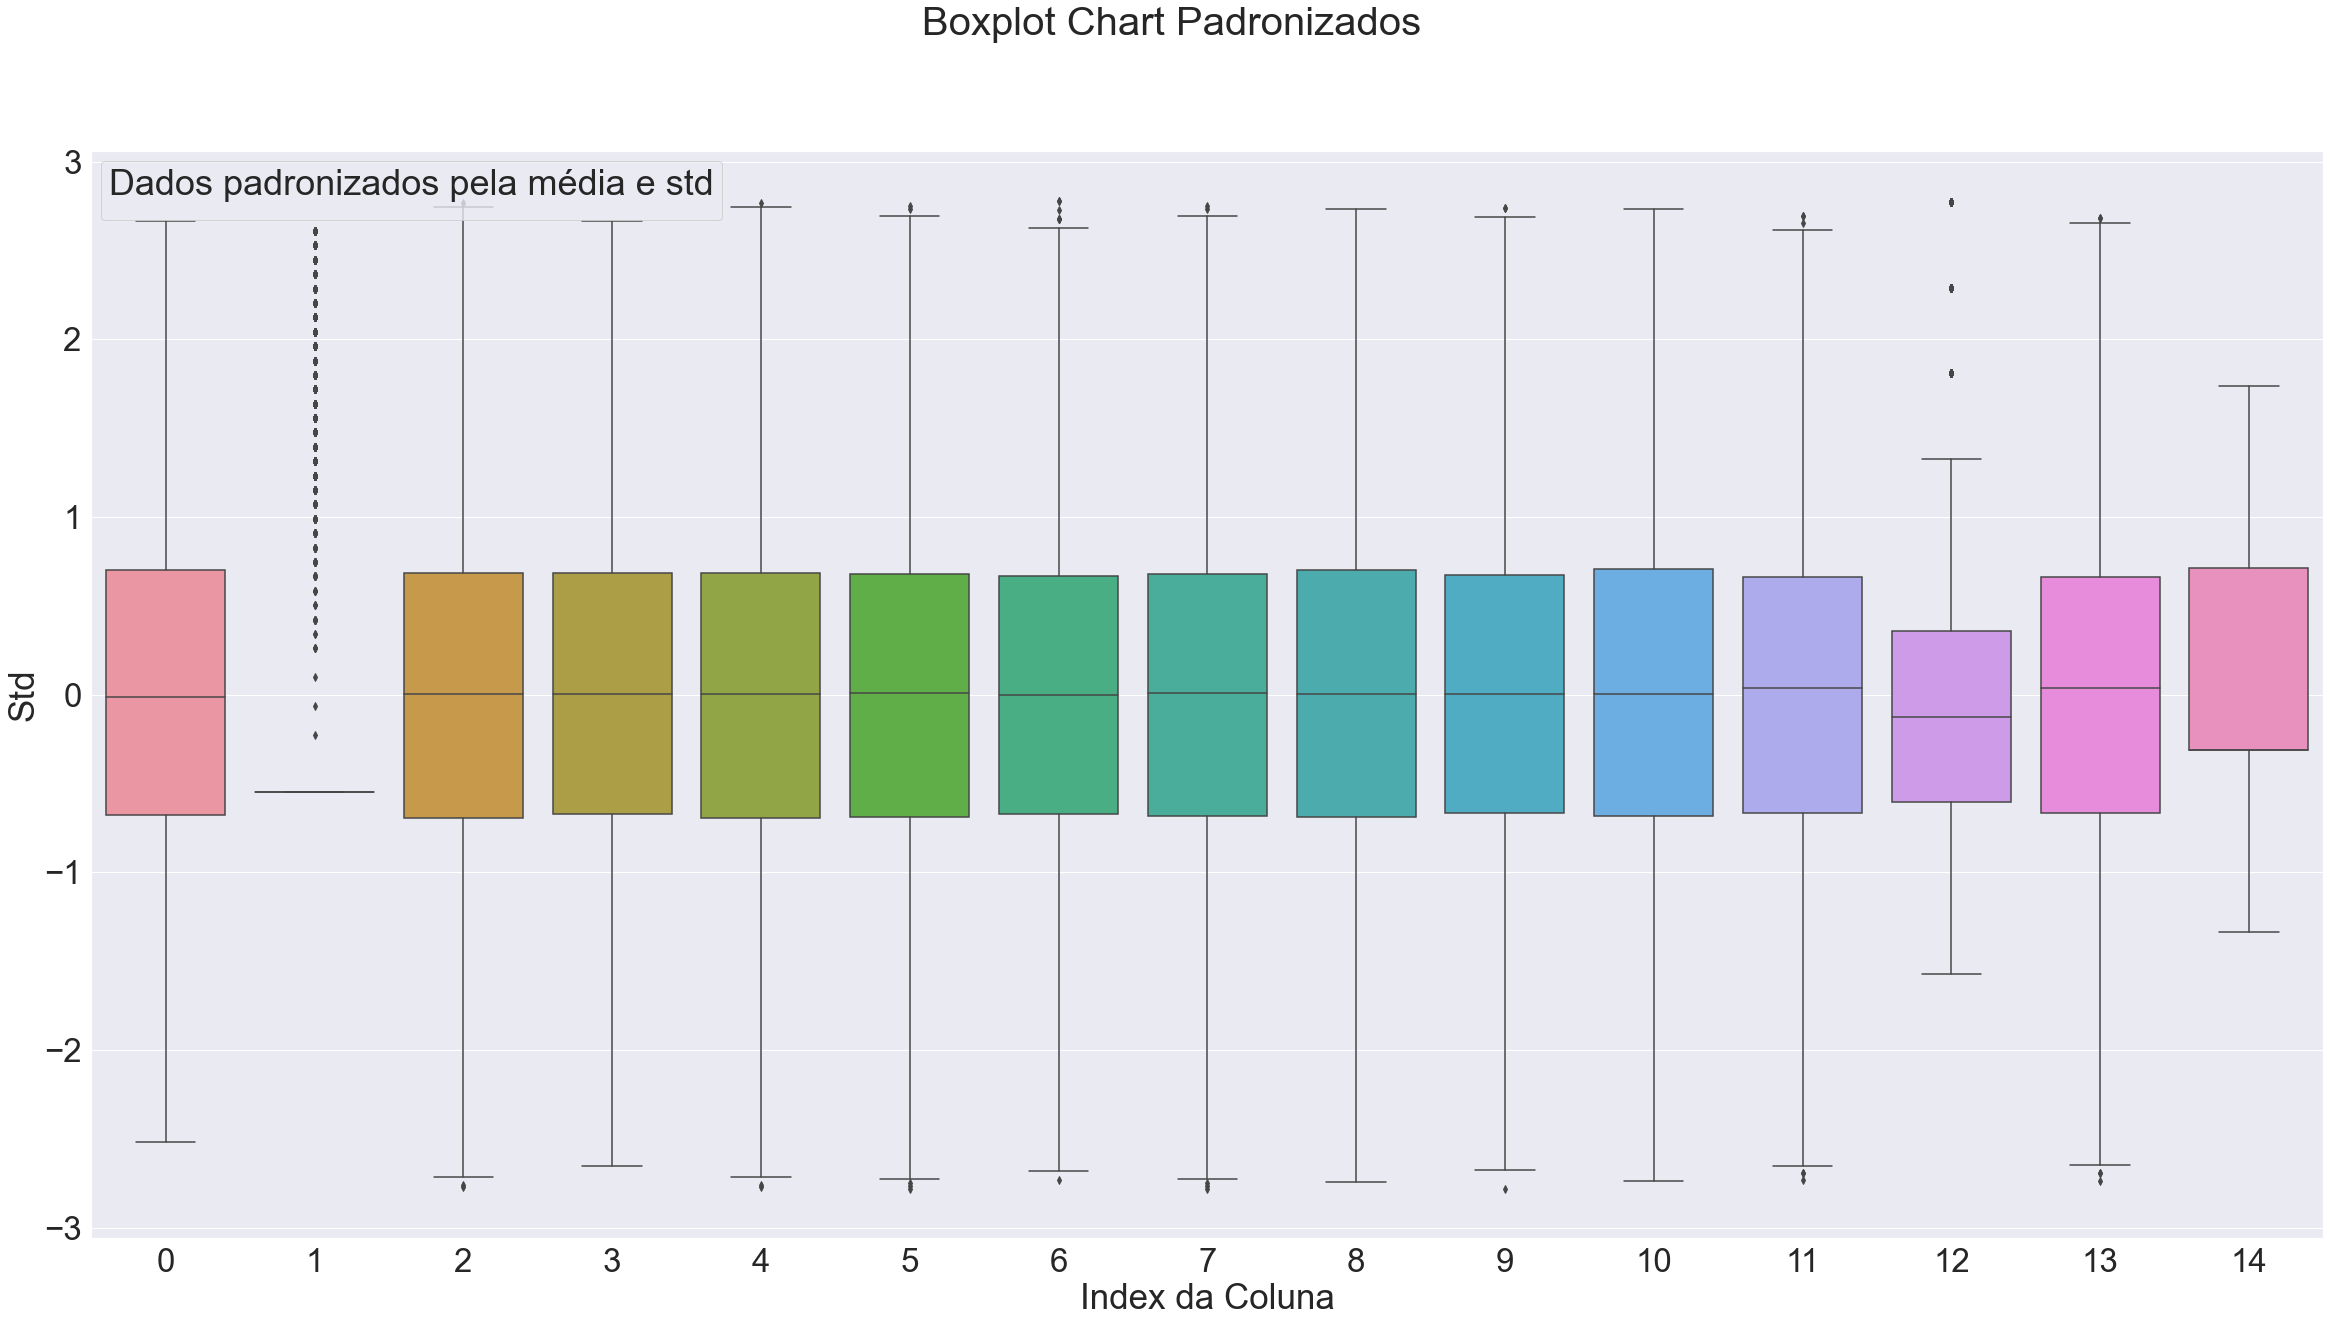

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


In [71]:
fig = plt.figure(figsize=[40, 20])
fig.suptitle('Boxplot Chart Padronizados', fontsize=40)

sns.boxplot(x="variable", y="value", data=pd.melt(pd.DataFrame(chart_data_std)))

plt.legend(title='Dados padronizados pela média e std', fontsize=20)
plt.ylabel('Std', fontsize=35);
plt.xlabel('Index da Coluna', fontsize=35);
plt.show()

print(chart_data.columns)

<AxesSubplot:>

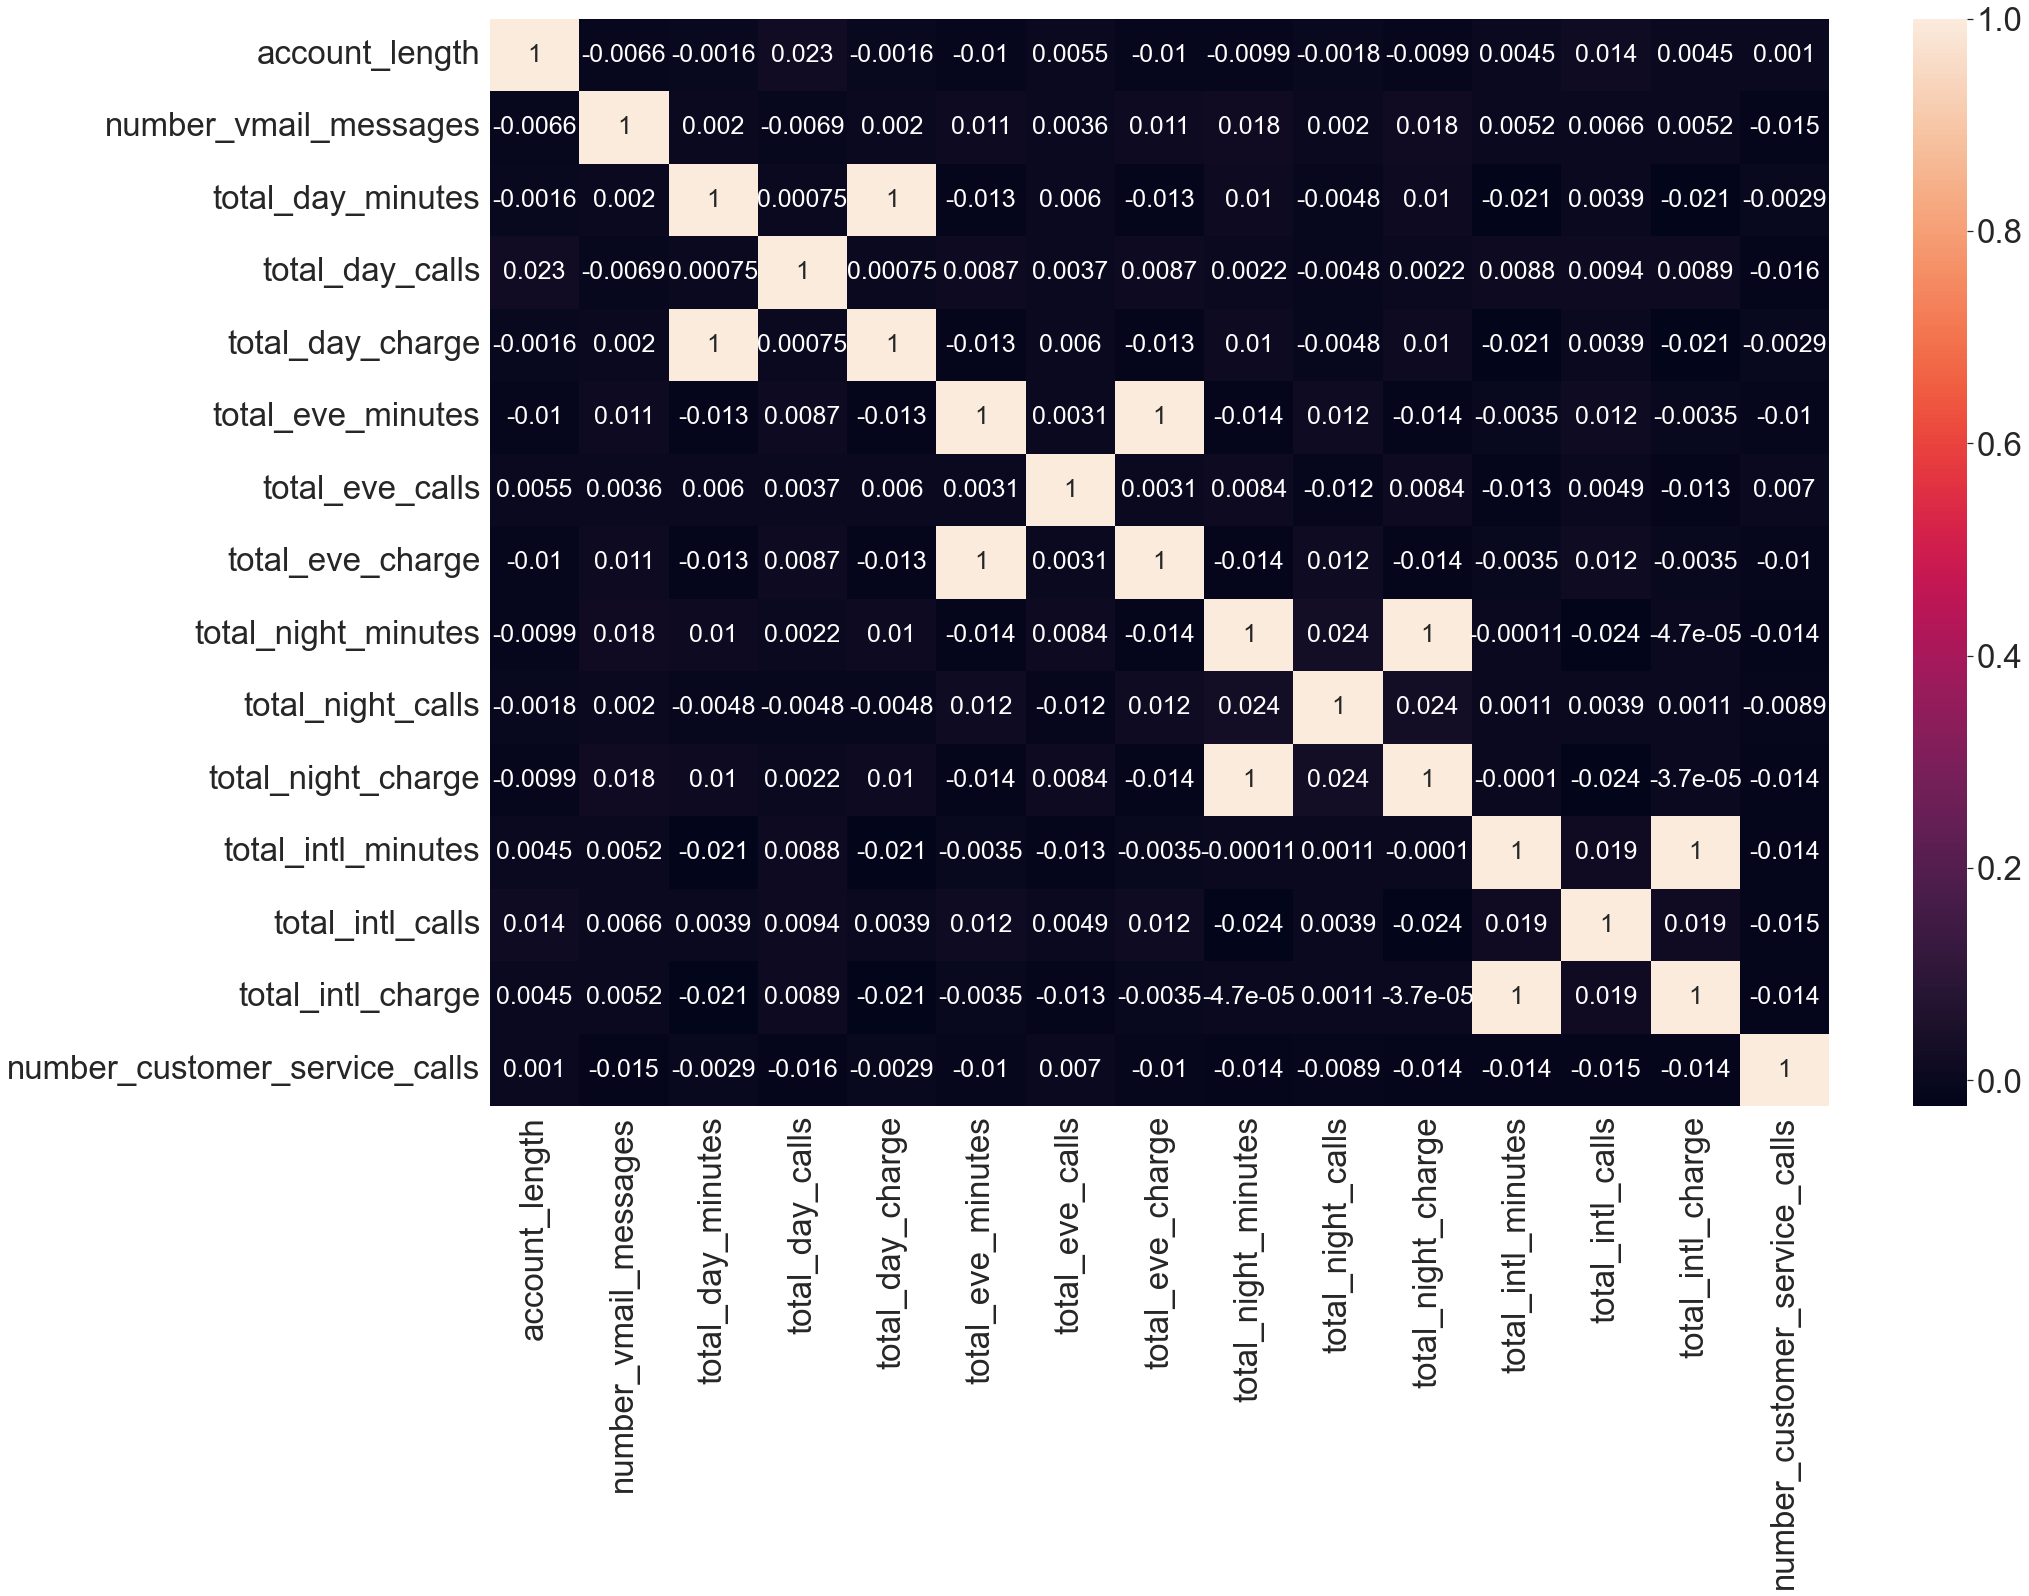

In [72]:
sns.set(font_scale=3)
fig = plt.figure(figsize=[30, 20])
sns.heatmap(chart_data.corr(), annot=True, annot_kws={"size": 25})

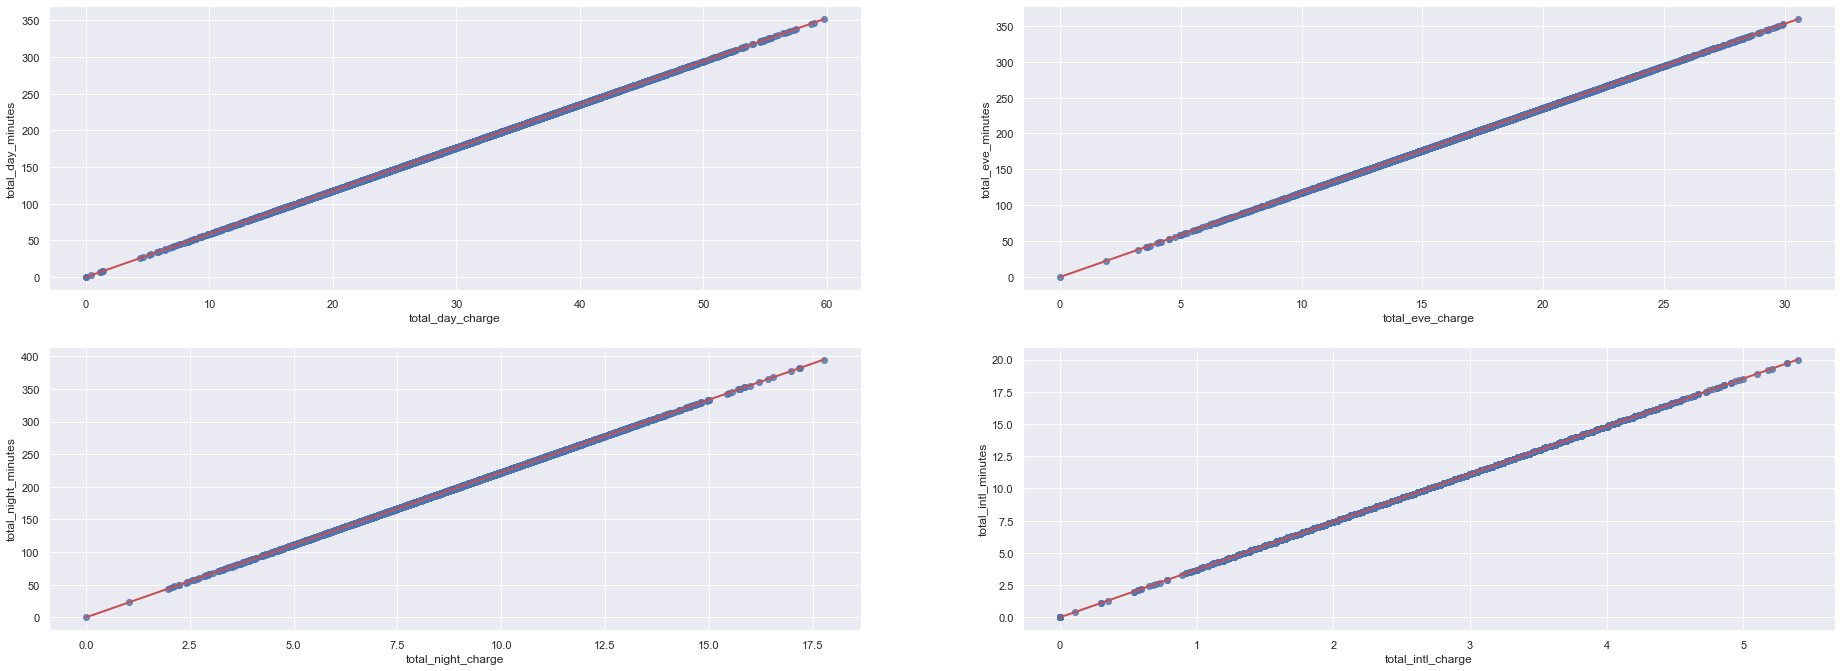

In [73]:
sns.set(font_scale=1)
fig = plt.figure(figsize=[32,24])

fig.add_subplot(4,2,1)
sns.regplot(x=chart_data["total_day_charge"], y=chart_data["total_day_minutes"], line_kws={"color":"r","alpha":1,"lw":2})

fig.add_subplot(4,2,2)
sns.regplot(x=chart_data["total_eve_charge"], y=chart_data["total_eve_minutes"], line_kws={"color":"r","alpha":1,"lw":2})

fig.add_subplot(4,2,3)
sns.regplot(x=chart_data["total_night_charge"], y=chart_data["total_night_minutes"], line_kws={"color":"r","alpha":1,"lw":2})

fig.add_subplot(4,2,4)
sns.regplot(x=chart_data["total_intl_charge"], y=chart_data["total_intl_minutes"], line_kws={"color":"r","alpha":1,"lw":2})

plt.show()

## Estatística Inferêncial 
- Diferença entrea proporção de duas populações.
#### __Churn entre assinantes e não assinantes do plano internacional:__

- Hipótese nula: não há diferença entre a proporção de 'churn' nos dois grupos.
   
   $H_0: p_1-p_2=0$
   
   $H_a: p_1-p_2 \ne 0$ 
- Nível de significância adotado $\alpha = 0.05$
- Assumimos dois grupos independentes com variáveis aleatórias
- Quantidade de almostras suficientemente grandes para presumir normalidade

In [74]:
crosstab_intl = pd.crosstab(index = train_dt['churn'], columns = train_dt['international_plan'] ,normalize=False, margins = True,margins_name= "Total")
crosstab_intl

international_plan,no,yes,Total
churn,,,
no,3423,229,3652
yes,431,167,598
Total,3854,396,4250


__Estatística de Teste:__
- Foi adotado um nível de significância de 0.05
- logo, para $H_0$ (Hipótese Nula) não ser descartada a condição $p_{value} > \alpha$ deve ser verdadeira.

In [75]:
n_1= crosstab_intl.iloc[2, 1]
n_2= crosstab_intl.iloc[2, 0]
p_1 = crosstab_intl.iloc[1, 1]/n_1
p_2 = crosstab_intl.iloc[1, 0]/n_2
p_d = p_1 - p_2
Z = p_d / (np.sqrt(p_d*(1 - p_d)*(1/n_1 + 1/n_2)))
print(' p_intl:',round(p_1,3), '\n p_no_intl:',round(p_2,3),'\n p_d:', round(p_d,3), '\n n_intl:', n_1, '\n n_no_intl:', n_2 , '\n Z statistic:', Z  )


 p_intl: 0.422 
 p_no_intl: 0.112 
 p_d: 0.31 
 n_intl: 396 
 n_no_intl: 3854 
 Z statistic: 12.698395237305308


In [76]:
pvalue = 2*dist.norm.sf(np.abs(Z)) #multiplicar por 2 indica teste bicalcal
print('p-value:', round(pvalue,4))

p-value: 0.0


__chi quadrado test ->__ retorna: 𝜒2 value, p-value, degree of freedom, e valores esperados (se $H_0$ verdadeira)

In [77]:
crosstab_intl_1 = pd.crosstab(index = train_dt['churn'], columns = train_dt['international_plan'])
stats.chi2_contingency(crosstab_intl_1, correction = False)

(285.21072208618847,
 5.497005280494065e-64,
 1,
 array([[3311.71952941,  340.28047059],
        [ 542.28047059,   55.71952941]]))

__Intervalo de Confiança:__

In [129]:
z_95 = 1.96
lcb = (p_d) - z_95 * np.sqrt((p_1*(1-p_1)/n_1)+(p_2*(1-p_2)/n_2)) # Lower Confidence Bound
ucb = (p_d) + z_95 * np.sqrt((p_1*(1-p_1)/n_1)+(p_2*(1-p_2)/n_2)) # Upper Confidence Bound
print(lcb, ucb)

0.06193199526117857 0.0937973032774079


- Estima-se, com 95% de confiança que a diferença entre a proporção de churn entre os assinantes de plano internacional e os não assinantes esteja contido no intervalo __[0.260 a 0.359]__
- Ou seja, baseado na amostra de 5250 clientes, com condiança de 95%, podemos __estimar__ entre 26% e 35.9% de ocorrência de 'churn' enter os assinantes do plano internacional.

#### __Churn entre códigos de área distintos:__

- Hipótese nula: não há diferença entre a proporção de 'churn' nos dois grupos.
   
   $H_0: p_1-p_2=0$
   
   $H_a: p_1-p_2 \ne 0$ 
- Nível de significância adotado $\alpha = 0.05$
- Assumimos dois grupos independentes com variáveis aleatórias
- Quantidade de almostras suficientemente grandes para presumir normalidade

In [79]:
crosstab_area = pd.crosstab(index = train_dt['churn'], columns = train_dt['area_code'] ,normalize=False, margins = True,margins_name= "Total")
crosstab_area

area_code,area_code_408,area_code_415,area_code_510,Total
churn,,,,
no,934,1821,897,3652
yes,152,287,159,598
Total,1086,2108,1056,4250


__Estatística de Teste:__
- Foi adotado um nível de significância de 0.05
- logo, para $H_0$ (Hipótese Nula) não ser descartada a condição $p_{value} > \alpha$ deve ser verdadeira.

In [80]:
n_1= crosstab_area.iloc[2, 0]+crosstab_area.iloc[2, 3]
n_2= crosstab_area.iloc[2, 1]
p_1 = (crosstab_area.iloc[1, 0]+crosstab_area.iloc[1, 2])/n_1
p_2 = crosstab_area.iloc[1, 1]/n_2
p_d = p_2 - p_1
Z = p_d / (np.sqrt(p_d*(1 - p_d)*(1/n_1 + 1/n_2)))
print(' p_area:',round(p_1,3), '\n p_415:',round(p_2,3),'\n p_d:', round(p_d,3), '\n n_area:', n_1, '\n n_415:', n_2 , '\n Z statistic:', Z  )


 p_area: 0.058 
 p_415: 0.136 
 p_d: 0.078 
 n_area: 5336 
 n_415: 2108 
 Z statistic: 11.295692513384191


In [81]:
pvalue = 2*dist.norm.sf(np.abs(Z)) #multiplicar por 2 indica teste bicalcal
print('p-value:', round(pvalue,4))

p-value: 0.0


### Engenharia de Atributos

In [82]:
# Importar training set
dt = pd.read_csv('customer-churn-prediction-2020/train.csv')
dt = dt.drop('state', axis=1)

# Remover Outliers
dt = Drop_Outlier(dt)

# Map variáveis categóricas
dt['churn'] = dt['churn'].map({'yes':1,'no':0})
dt['area_code'] = dt['area_code'].map({'area_code_415':1,'area_code_408':0,'area_code_510':0})
dt['international_plan'] = dt['international_plan'].map({'yes':1,'no':0})
dt['voice_mail_plan'] = dt['voice_mail_plan'].map({'yes':1,'no':0})

In [83]:
# Minutos totais
dt['total_minutes'] = dt['total_day_minutes'] + dt['total_eve_minutes'] + dt['total_night_minutes'] + dt['total_intl_minutes']
dt['total_charge'] = dt['total_day_charge'] + dt['total_eve_charge'] + dt['total_night_charge'] + dt['total_intl_charge']

<AxesSubplot:>

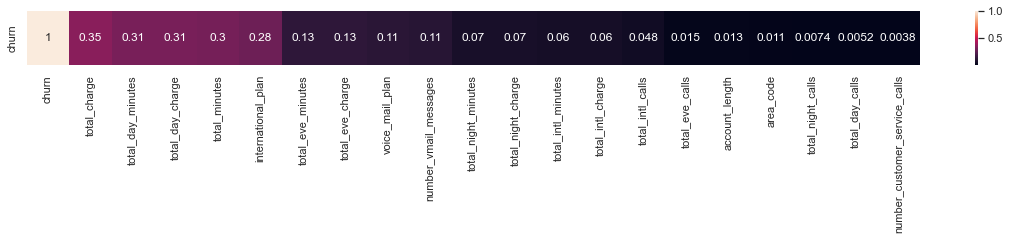

In [126]:
sns.set(font_scale=1)
fig = plt.figure(figsize=[20, 1])
sns.heatmap(np.abs(dt.corr()[18:19]).sort_values(by='churn',axis=1 ,ascending=False), annot=True, annot_kws={"size": 12})

# Modelagem

In [185]:
X = dt.drop('churn',axis=1)
Y = dt['churn']

X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.20 , random_state = 123)

### Base

In [233]:
#Modelo Base
y_pred = X_train.iloc[:,2]

resultados = {'Acuracidade': [accuracy_score(y_train, y_pred)], 'Recall': [recall_score(y_train, y_pred)],
            'Precisão':[precision_score(y_train, y_pred)], 'f1':[f1_score(y_train, y_pred)]}
pd.DataFrame(resultados).head()

,Acuracidade,Recall,Precisão,f1
0,0.868911,0.331104,0.373585,0.351064


____

In [346]:
def avaliar_modelo (modelo, X, Y):
    #Cross Validation
    acc=[]
    recall=[]
    precision=[]
    f1=[]
    kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=123)
    for linhas_treino, linhas_valid in kf.split(X_train):
        
        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        Y_treino, Y_valid = Y.iloc[linhas_treino], Y.iloc[linhas_valid]

        modelo.fit(X_treino, Y_treino)

        y_pred = modelo.predict(X_valid)
        
        acc.append(accuracy_score(Y_valid,y_pred))
        recall.append(recall_score(Y_valid, y_pred))
        precision.append(precision_score(Y_valid, y_pred))
        f1.append(f1_score(Y_valid, y_pred))

    resultados = {'Acuracidade': [np.mean(acc)], 'Recall': [np.mean(recall)], 'Precisão':[np.mean(precision)], 'f1':[np.mean(f1)]}
    resultados = pd.DataFrame(resultados)

    sns.set(font_scale=1.5)
    plot_confusion_matrix(modelo, X, Y, display_labels=['No Churn','Churn'],cmap=plt.cm.Blues_r)
    plt.grid(b=None)
    plt.show()
    
    return resultados

### Regressão Logística

In [347]:
# Regressão Logística
modelo_1 = LogisticRegression(random_state=12345)

/Users/puppim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/puppim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

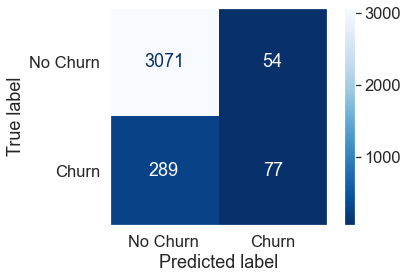

,Acuracidade,Recall,Precisão,f1
0,0.901683,0.146002,0.647494,0.235714


In [348]:
result = avaliar_modelo(modelo_1, X, Y)
result.head()

In [247]:
import statsmodels.api as sm
model_2 = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result_2 = model_2.fit()
result_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 2792
Model:                            GLM   Df Residuals:                     2774
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -718.68
Date:                Mon, 26 Sep 2022   Deviance:                       1437.4
Time:                        19:23:53   Pearson chi2:                 4.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
account_length                   -0.0019      0.002     -1.086      0.277      -0.005       0.002
area_code                        -0.2084      0.139     -1.499      0.134      -0.481       0.064
international_plan                2.2101      0.176     12.548      0.000       1.865       2.555
voice_mail_plan                  -2.1556      0.963     -2.238      0.025      -4.044      -0.268
number_vmail_messages             0.0162      0.033      0.491      0.623      -0.048       0.081
total_day_minutes                 5.1160      3.589      1.425      0.154      -1.919      12.151
total_day_calls                  -0.0184      0.003     -5.477      0.000      -0.025      -0.012
total_day_charge                -24.9944     21.118     -1.184      0.237     -66.384      16.395
total_eve_minutes                -1.7608      2.228     -0.790      0.429      -6.128       2.607
total_eve_calls                  -0.0216      0.003     -6.362      0.000      -0.028      -0.015
total_eve_charge                 11.2360     20.624      0.545      0.586     -29.186      51.658
total_night_minutes              -0.8645      1.821     -0.475      0.635      -4.434       2.705
total_night_calls                -0.0189      0.003     -5.606      0.000      -0.025      -0.012
total_night_charge              -16.0898     21.184     -0.760      0.448     -57.610      25.431
total_intl_minutes               -0.0228      5.301     -0.004      0.997     -10.413      10.368
total_intl_calls                 -0.1589      0.035     -4.569      0.000      -0.227      -0.091
total_intl_charge                10.3429     21.068      0.491      0.623     -30.949      51.635
number_customer_service_calls    -0.1273      0.070     -1.827      0.068      -0.264       0.009
total_minutes                     2.4680      1.615      1.528      0.126      -0.697       5.633
total_charge                    -19.5053      9.700     -2.011      0.044     -38.518      -0.493
=================================================================================================
"""

### Modelo 2: Random Forest Classifier

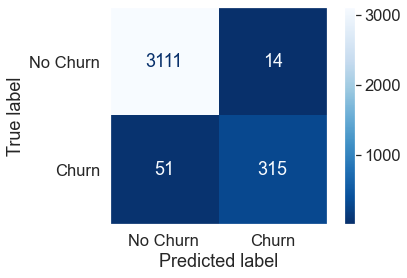

,Acuracidade,Recall,Precisão,f1
0,0.969162,0.713995,0.991131,0.829237


In [349]:
modelo_2 = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=20)
result = avaliar_modelo(modelo_2, X, Y)
result.head()

## Modelo 3: KNeighbors Classifier

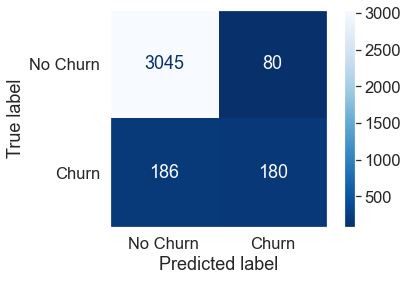

,Acuracidade,Recall,Precisão,f1
0,0.917228,0.405789,0.681785,0.506877


In [350]:
modelo_3 = KNeighborsClassifier(n_neighbors=3)
result = avaliar_modelo(modelo_3, X,Y)
result.head()

Sub to Kaggle


In [276]:
# Importar training set
test_df  = pd.read_csv('customer-churn-prediction-2020/test.csv')
test_dt = test_df.drop(['state','id'], axis=1)

# Map variáveis categóricas
test_dt['area_code'] = test_df['area_code'].map({'area_code_415':1,'area_code_408':0,'area_code_510':0})
test_dt['international_plan'] = test_df['international_plan'].map({'yes':1,'no':0})
test_dt['voice_mail_plan'] = test_df['voice_mail_plan'].map({'yes':1,'no':0})

# Minutos totais
test_dt['total_minutes'] = test_df['total_day_minutes'] + test_df['total_eve_minutes'] + test_df['total_night_minutes'] + test_df['total_intl_minutes']
test_dt['total_charge'] = test_df['total_day_charge'] + test_df['total_eve_charge'] + test_df['total_night_charge'] + test_df['total_intl_charge']

In [321]:
modelo_2 = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=20)
modelo_2.fit(X,Y)
p = modelo_2.predict(test_dt)
p.shape

(750,)

In [331]:
sub = pd.Series(p, index=test_df['id'], name='churn')
sub = pd.DataFrame(sub,columns=['churn'])
sub['churn']=sub['churn'].map({1:'yes', 0:'no'})

In [333]:
# Arquivo para submeter
sub.to_csv('Churn_Prediction_1.csv', header=True)